In [4]:
import Pkg
Pkg.add("ROC")

    Updating registry at `C:\Users\divyansh\.julia\registries\General.toml`


LoadError: The following package names could not be resolved:
 * ROC (not found in project, manifest or registry)


In [12]:
add https://github.com/diegozea/ROC.jl

LoadError: syntax: extra token "https" after end of expression

In [124]:
using Random
using Plots
using CSV
using DataFrames
using MLJ
using MLJLIBSVMInterface
using CategoricalArrays
using ROC
import LIBSVM
import Statistics
using PrettyPrinting

In [102]:
function plot_svc(model, x, y, count,h=0.02, pad=0.25)
    x_min = minimum(x[:, 1]) - pad
    x_max = maximum(x[:, 1]) + pad
    y_min = minimum(x[:, 2]) - pad
    y_max = maximum(x[:, 2]) + pad
    
    xx = x_min:h:x_max
    yy = y_min:h:y_max
    
    f(i, j) = begin 
        c = reshape([i; j], (2, 1))
        pred = svmpredict(model, c) 
        return pred[2][1]
    end
    

    contour(xx, yy, f, fill = true, colorbar_entry=false, levels=count)
end

plot_svc (generic function with 3 methods)

Y will be a bitvector.You need to convert it to matrix using reshape method

In [103]:
Random.seed!(5)
X=rand(20,2)
y=repeat([1,-1],10)
ym1 = y .== -1
ym2 = .!ym1
X[ym1,:]=X[ym1,:] .+1.0

10×2 Matrix{Float64}:
 1.89062  1.33864
 1.42335  1.29973
 1.99384  1.73698
 1.02714  1.65921
 1.97927  1.66977
 1.77017  1.33354
 1.15815  1.14704
 1.16572  1.76075
 1.92172  1.33495
 1.98993  1.94847

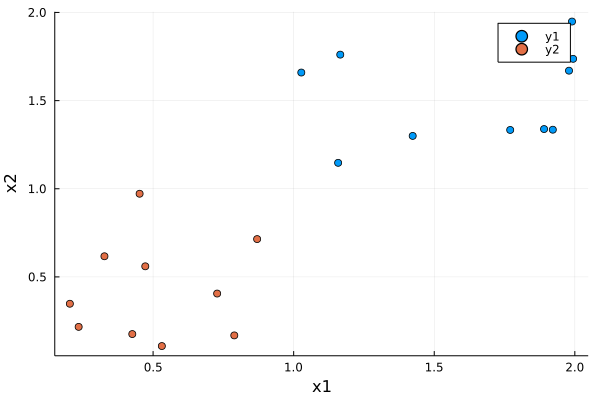

In [104]:
scatter(X[ym1,1],X[ym1,2])
scatter!(X[ym2,1],X[ym2,2],xlabel="x1",ylabel="x2")

In [105]:
model=svmtrain(transpose(X),y,kernel=Kernel.Linear,cost=1.0)


LIBSVM.SVM{Int64, LIBSVM.Kernel.KERNEL}(SVC, LIBSVM.Kernel.Linear, nothing, 2, 20, 2, [1, -1], Int32[1, 2], Float64[], Int32[], LIBSVM.SupportVectors{Vector{Int64}, Matrix{Float64}}(6, Int32[3, 3], [1, 1, 1, -1, -1, -1], [0.8700506073165521 0.45204419323139544 … 1.0271356890211796 1.1581492940428846; 0.7145221805541991 0.9717592154668062 … 1.6592078860366613 1.1470437521939534], Int32[3, 5, 13, 4, 8, 14], LIBSVM.SVMNode[LIBSVM.SVMNode(1, 0.8700506073165521), LIBSVM.SVMNode(1, 0.45204419323139544), LIBSVM.SVMNode(1, 0.727854587866495), LIBSVM.SVMNode(1, 1.423354361278987), LIBSVM.SVMNode(1, 1.0271356890211796), LIBSVM.SVMNode(1, 1.1581492940428846)]), 0.0, [1.0; 1.0; … ; -0.7385856163646054; -1.0;;], Float64[], Float64[], [-2.3977044404069683], 3, 0.5, 200.0, 0.001, 1.0, 0.5, 0.1, true, false)

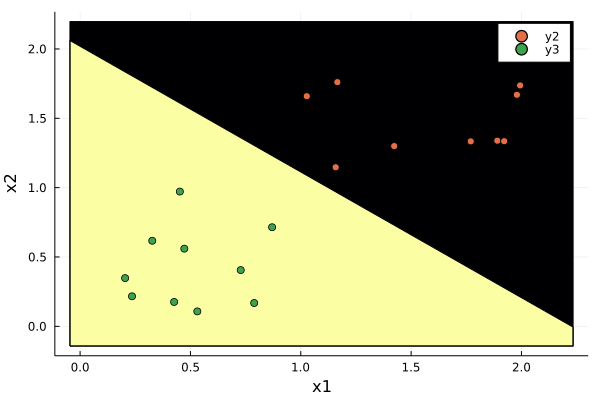

In [106]:
plot_svc(model,X,y,1)
scatter!(X[ym1,1],X[ym1,2])
scatter!(X[ym2,1],X[ym2,2],xlabel="x1",ylabel="x2")

In [107]:
X_ = MLJ.table(X)
Y=categorical(y)

20-element CategoricalArray{Int64,1,UInt32}:
 1
 -1
 1
 -1
 1
 -1
 1
 -1
 1
 -1
 1
 -1
 1
 -1
 1
 -1
 1
 -1
 1
 -1

DeterministicTunedModel(
  model = SVC(
        kernel = LIBSVM.Kernel.RadialBasis, 
        gamma = 0.0, 
        cost = 1.0, 
        cachesize = 200.0, 
        degree = 3, 
        coef0 = 0.0, 
        tolerance = 0.001, 
        shrinking = true, 
        probability = false), 
  tuning = Grid(
        goal = nothing, 
        resolution = 10, 
        shuffle = true, 
        rng = Random._GLOBAL_RNG()), 
  resampling = CV(
        nfolds = 3, 
        shuffle = true, 
        rng = MersenneTwister(33)), 
  measure = MisclassificationRate(), 
  weights = nothing, 
  operation = nothing, 
  range = MLJBase.NumericRange{Float64, MLJBase.Bounded, Symbol}[NumericRange(0.1 ≤ cost ≤ 5.0; origin=2.55, unit=2.45)], 
  selection_heuristic = MLJTuning.NaiveSelection(nothing), 
  train_best = true, 
  repeats = 1, 
  n = nothing, 
  acceleration = CPU1{Nothing}(nothing), 
  acceleration_resampling = CPU1{Nothing}(nothing), 
  check_measure = true, 
  cache = true)

In [138]:
# mach=machine(tm,X_,Y);
# MLJ.fit(mach)
# entry = report(tm).best_history_entry

LoadError: MethodError: no method matching fit(::Machine{MLJTuning.DeterministicTunedModel{Grid, MLJLIBSVMInterface.SVC}, true})
[0mClosest candidates are:
[0m  fit([91m::Stack[39m, [91m::Int64[39m, [91m::Any[39m, [91m::Any[39m) at C:\Users\divyansh\.julia\packages\MLJBase\wnJff\src\composition\models\stacking.jl:414
[0m  fit([91m::Union{MLJBase.TransformedTargetModelDeterministic, MLJBase.TransformedTargetModelDeterministicSupervisedDetector, MLJBase.TransformedTargetModelDeterministicUnsupervisedDetector, MLJBase.TransformedTargetModelInterval, MLJBase.TransformedTargetModelProbabilistic, MLJBase.TransformedTargetModelProbabilisticSupervisedDetector, MLJBase.TransformedTargetModelProbabilisticUnsupervisedDetector}[39m, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m, [91m::Any...[39m) at C:\Users\divyansh\.julia\packages\MLJBase\wnJff\src\composition\models\transformed_target_model.jl:177
[0m  fit([91m::Union{MLJBase.DeterministicPipeline{N, operation}, MLJBase.IntervalPipeline{N, operation}, MLJBase.ProbabilisticPipeline{N, operation}, MLJBase.StaticPipeline{N, operation}, MLJBase.UnsupervisedPipeline{N, operation}}[39m, [91m::Integer[39m) where {N, operation} at C:\Users\divyansh\.julia\packages\MLJBase\wnJff\src\composition\models\pipelines.jl:511
[0m  ...

In [ ]:
# model2=svmtrain(transpose(X),y,kernel=Kernel.Linear,cost=0.1)
plot_svc(model2,X,y,1)
scatter!(X[ym1,1],X[ym1,2])
scatter!(X[ym2,1],X[ym2,2],xlabel="x1",ylabel="x2")

In [8]:
Random.seed!(1)
rng = MersenneTwister(10);
X_test=rand(rng, Float64,(20,2))
y_test=repeat([1,-1],10)
ym1 = y_test .== -1
ym2 = .!ym1
X_test[ym1,:]=X_test[ym1,:] .+ 0.7

10×2 Matrix{Float64}:
 1.06831   1.29617
 0.756645  1.62335
 0.879574  1.12957
 1.5151    0.950287
 1.51978   1.27579
 1.15306   0.820773
 1.37919   1.44411
 1.62368   1.15272
 1.69917   1.13563
 1.12042   0.874547

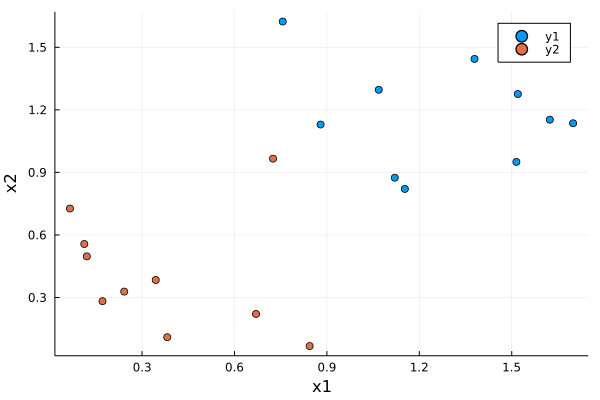

In [9]:
scatter(X_test[ym1,1],X_test[ym1,2])
scatter!(X_test[ym2,1],X_test[ym2,2],xlabel="x1",ylabel="x2")

In [10]:
y_pred, decision_values=svmpredict(model2,transpose(X_test))

([1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1], [0.951275790798715 -0.16019537846033005 … 1.0946721281315388 0.08544733966867923; 0.0 0.0 … 0.0 0.0])

In [11]:
model3=svmtrain(transpose(X),y,kernel=Kernel.Linear,cost=0.001)

LIBSVM.SVM{Int64, LIBSVM.Kernel.KERNEL}(SVC, LIBSVM.Kernel.Linear, nothing, 2, 20, 2, [1, -1], Int32[1, 2], Float64[], Int32[], LIBSVM.SupportVectors{Vector{Int64}, Matrix{Float64}}(20, Int32[10, 10], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0.20397479276512875 0.8700506073165521 … 1.921716669609433 1.9899313604017252; 0.3477776317605237 0.7145221805541991 … 1.334954814734766 1.9484728035434387], Int32[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], LIBSVM.SVMNode[LIBSVM.SVMNode(1, 0.20397479276512875), LIBSVM.SVMNode(1, 0.8700506073165521), LIBSVM.SVMNode(1, 0.45204419323139544), LIBSVM.SVMNode(1, 0.7888326559680227), LIBSVM.SVMNode(1, 0.3269857804459574), LIBSVM.SVMNode(1, 0.47225482425801946), LIBSVM.SVMNode(1, 0.727854587866495), LIBSVM.SVMNode(1, 0.4260373399702665), LIBSVM.SVMNode(1, 0.2352649154510822), LIBSVM.SVMNode(1, 0.5311477811962938), LIBSVM.SVMNode(1, 1.89061613226343), LIBSVM.SVMNode(1, 1.423354361278987), LIBSVM.S

In [12]:
y_pred, decision_values=svmpredict(model3,transpose(X_test))

([1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1], [0.017040523163751542 -0.0018381995356433617 … 0.01937494850504978 0.0021879912592382283; 0.0 0.0 … 0.0 0.0])

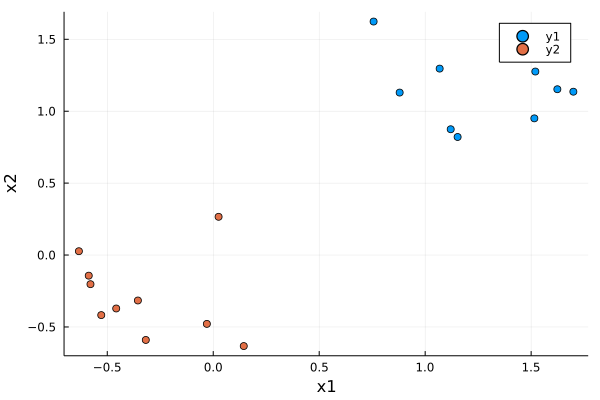

In [13]:
X_test[ym2,:]=X_test[ym2,:] .- 0.7
scatter(X_test[ym1,1],X_test[ym1,2])
scatter!(X_test[ym2,1],X_test[ym2,2],xlabel="x1",ylabel="x2")

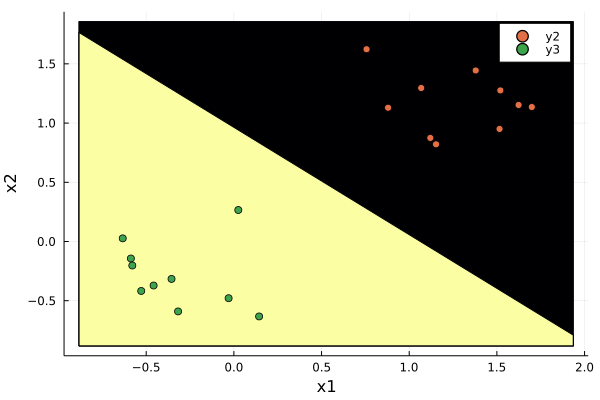

In [14]:
model4=svmtrain(transpose(Matrix(X_test)),y_test,kernel=Kernel.Linear,cost=10.0)
plot_svc(model,X_test,y_test,1)
scatter!(X_test[ym1,1],X_test[ym1,2])
scatter!(X_test[ym2,1],X_test[ym2,2],xlabel="x1",ylabel="x2")

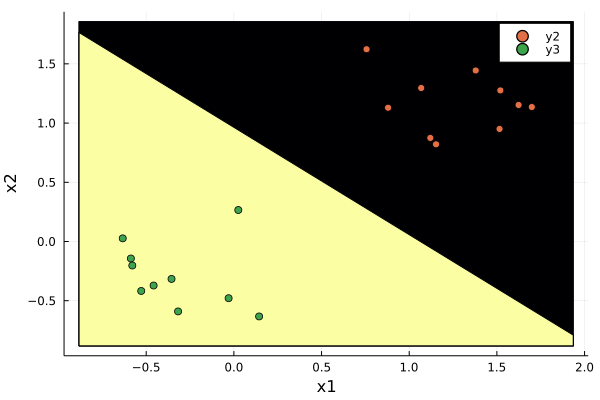

In [15]:
model5=svmtrain(transpose(Matrix(X_test)),y_test,kernel=Kernel.Linear,cost=1.0)
plot_svc(model,X_test,y_test,1)
scatter!(X_test[ym1,1],X_test[ym1,2])
scatter!(X_test[ym2,1],X_test[ym2,2],xlabel="x1",ylabel="x2")

# Support Vectors

In [16]:
Random.seed!(8)
X=randn(2,200)
X[:, 1:100] = X[:, 1:100] .+ 2;
X[:, 101:150] = X[:, 101:150] .- 2;
y=vcat(repeat([-1],150),repeat([1],50))
ym1 = y .== -1
ym2 = .!ym1

200-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

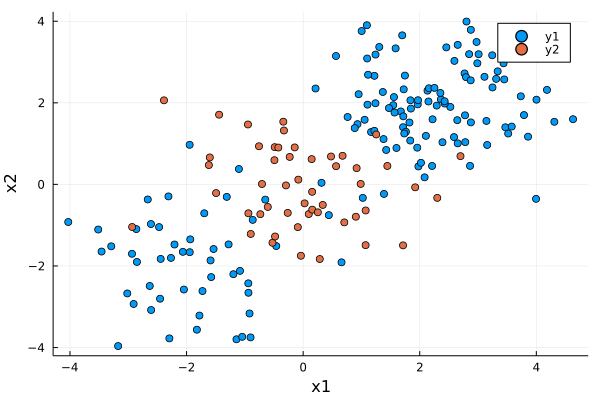

In [17]:
scatter(X[1,ym1],X[2,ym1])
scatter!(X[1,ym2],X[2,ym2],xlabel="x1",ylabel="x2")

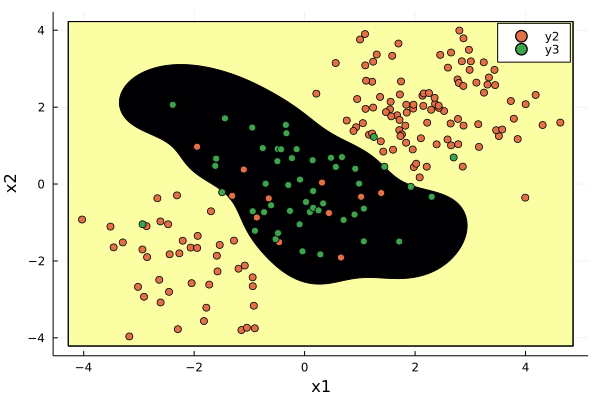

In [18]:
model=svmtrain(X,y,kernel=Kernel.RadialBasis,gamma=1.0,cost=1.0)
plot_svc(model,X',y,1)
scatter!(X[1,ym1],X[2,ym1])
scatter!(X[1,ym2],X[2,ym2],xlabel="x1",ylabel="x2")

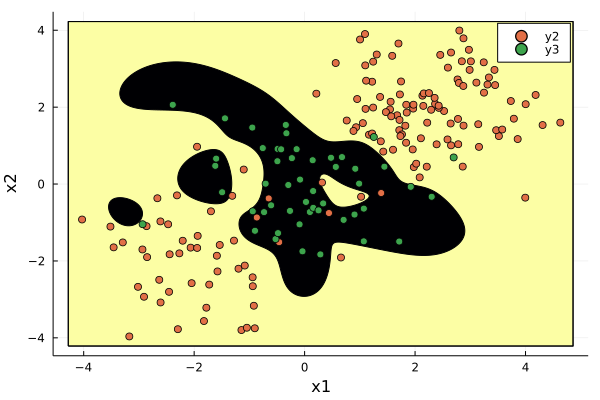

In [19]:
model2=svmtrain(X,y,kernel=Kernel.RadialBasis,gamma=1.0,cost=100.0)
plot_svc(model2,X',y,1)
scatter!(X[1,ym1],X[2,ym1])
scatter!(X[1,ym2],X[2,ym2],xlabel="x1",ylabel="x2")

# ROC Curves

In [20]:
model3=svmtrain(X,y,kernel=Kernel.RadialBasis,gamma=2.0,cost=1.0)

LIBSVM.SVM{Int64, LIBSVM.Kernel.KERNEL}(SVC, LIBSVM.Kernel.RadialBasis, nothing, 2, 200, 2, [-1, 1], Int32[1, 2], Float64[], Int32[], LIBSVM.SupportVectors{Vector{Int64}, Matrix{Float64}}(109, Int32[71, 38], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [4.182806454827856 2.8018462983287824 … 0.3360170952516385 1.0712848583675252; 2.3170059150675897 3.992519141959125 … -0.5037233085458436 -1.4903543277921028], Int32[1, 7, 11, 15, 20, 24, 25, 29, 31, 32  …  188, 190, 191, 192, 194, 196, 197, 198, 199, 200], LIBSVM.SVMNode[LIBSVM.SVMNode(1, 4.182806454827856), LIBSVM.SVMNode(1, 2.8018462983287824), LIBSVM.SVMNode(1, 0.5628783772176063), LIBSVM.SVMNode(1, 2.220112897031008), LIBSVM.SVMNode(1, 3.1439787297753243), LIBSVM.SVMNode(1, 1.1656389765554391), LIBSVM.SVMNode(1, 1.4244302414321752), LIBSVM.SVMNode(1, 1.9774689644063979), LIBSVM.SVMNode(1, 1.3666397304665998), LIBSVM.SVMNode(1, 3.995372475379286)  …  LIBSVM.SVMNode(1, 0.9037292875837091), LIBSVM.SVMNode(

In [21]:
model4=svmtrain(X,y,kernel=Kernel.RadialBasis,gamma=50.0,cost=1.0)

LIBSVM.SVM{Int64, LIBSVM.Kernel.KERNEL}(SVC, LIBSVM.Kernel.RadialBasis, nothing, 2, 200, 2, [-1, 1], Int32[1, 2], Float64[], Int32[], LIBSVM.SupportVectors{Vector{Int64}, Matrix{Float64}}(197, Int32[147, 50], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [4.182806454827856 3.788617509300007 … 0.3360170952516385 1.0712848583675252; 2.3170059150675897 1.6996400047221873 … -0.5037233085458436 -1.4903543277921028], Int32[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  191, 192, 193, 194, 195, 196, 197, 198, 199, 200], LIBSVM.SVMNode[LIBSVM.SVMNode(1, 4.182806454827856), LIBSVM.SVMNode(1, 3.788617509300007), LIBSVM.SVMNode(1, 1.0982686002401014), LIBSVM.SVMNode(1, 1.5458017226380953), LIBSVM.SVMNode(1, 2.8470601381946947), LIBSVM.SVMNode(1, 2.974690152272168), LIBSVM.SVMNode(1, 2.8018462983287824), LIBSVM.SVMNode(1, 2.77688009514372), LIBSVM.SVMNode(1, 2.8774949235528657), LIBSVM.SVMNode(1, 2.1055372138510853)  …  LIBSVM.SVMNode(1, 0.28510745424302547), LIBSVM.SVMNode(1, -0.0

In [22]:
ŷ1, decision_values1 = svmpredict(model3, X);
ŷ2, decision_values2 = svmpredict(model4, X);

# SVM with Multiple Classes

In [23]:
Random.seed!(8)
XX=hcat(X,randn(2,50))
yy=vcat(y,repeat([0],50))
ym1= yy .==1
ym2= yy .==-1
ym3 = yy .== 0
XX[:,ym3]=XX[:,ym3] .+ 4


2×50 Matrix{Float64}:
 6.18281  5.78862  3.09827  3.5458   …  4.52482  5.44945  4.35681  4.92432
 4.31701  3.69964  5.08649  3.94216     3.89956  4.57359  3.87115  4.61178

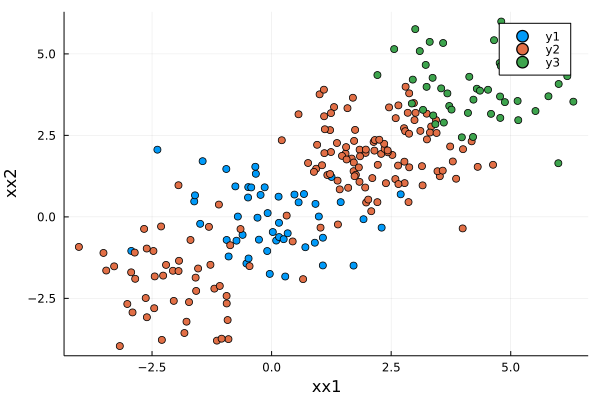

In [24]:
scatter(XX[1,ym1],XX[2,ym1])
scatter!(XX[1,ym2],XX[2,ym2])
scatter!(XX[1,ym3],XX[2,ym3],xlabel="xx1",ylabel="xx2")

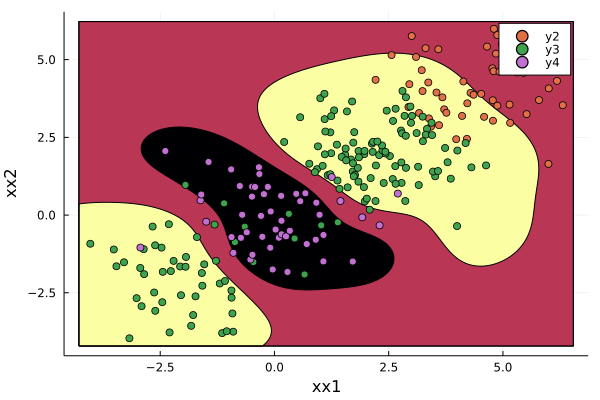

In [25]:
model5=svmtrain(XX,yy)
plot_svc(model5,XX',yy,2)
scatter!(XX[1,ym3],XX[2,ym3])
scatter!(XX[1,ym2],XX[2,ym2])
scatter!(XX[1,ym1],XX[2,ym1],xlabel="xx1",ylabel="xx2")

In [139]:
rc = range(MLJLIBSVMInterface.SVC(), :cost, lower=0.1, upper=5)
tm = TunedModel(model=MLJLIBSVMInterface.SVC(), ranges=[rc], tuning=Grid(resolution=10),
                resampling=CV(nfolds=3, rng=33), measure=misclassification_rate)

DeterministicTunedModel(
  model = SVC(
        kernel = LIBSVM.Kernel.RadialBasis, 
        gamma = 0.0, 
        cost = 1.0, 
        cachesize = 200.0, 
        degree = 3, 
        coef0 = 0.0, 
        tolerance = 0.001, 
        shrinking = true, 
        probability = false), 
  tuning = Grid(
        goal = nothing, 
        resolution = 10, 
        shuffle = true, 
        rng = Random._GLOBAL_RNG()), 
  resampling = CV(
        nfolds = 3, 
        shuffle = true, 
        rng = MersenneTwister(33)), 
  measure = MisclassificationRate(), 
  weights = nothing, 
  operation = nothing, 
  range = MLJBase.NumericRange{Float64, MLJBase.Bounded, Symbol}[NumericRange(0.1 ≤ cost ≤ 5.0; origin=2.55, unit=2.45)], 
  selection_heuristic = MLJTuning.NaiveSelection(nothing), 
  train_best = true, 
  repeats = 1, 
  n = nothing, 
  acceleration = CPU1{Nothing}(nothing), 
  acceleration_resampling = CPU1{Nothing}(nothing), 
  check_measure = true, 
  cache = true)

In [140]:
rc1=range(MLJLIBSVMInterface.SVC(), :cost, lower=0.01, upper=5)
rc2=range(MLJLIBSVMInterface.SVC(), :gamma, lower=0.5, upper=4)
tm2 = TunedModel(model=MLJLIBSVMInterface.SVC(), ranges=[rc1,rc2], tuning=Grid(resolution=10),
                resampling=CV(nfolds=3, rng=33), measure=misclassification_rate)

DeterministicTunedModel(
  model = SVC(
        kernel = LIBSVM.Kernel.RadialBasis, 
        gamma = 0.0, 
        cost = 1.0, 
        cachesize = 200.0, 
        degree = 3, 
        coef0 = 0.0, 
        tolerance = 0.001, 
        shrinking = true, 
        probability = false), 
  tuning = Grid(
        goal = nothing, 
        resolution = 10, 
        shuffle = true, 
        rng = Random._GLOBAL_RNG()), 
  resampling = CV(
        nfolds = 3, 
        shuffle = true, 
        rng = MersenneTwister(33)), 
  measure = MisclassificationRate(), 
  weights = nothing, 
  operation = nothing, 
  range = MLJBase.NumericRange{Float64, MLJBase.Bounded, Symbol}[NumericRange(0.01 ≤ cost ≤ 5.0; origin=2.505, unit=2.495), NumericRange(0.5 ≤ gamma ≤ 4.0; origin=2.25, unit=1.75)], 
  selection_heuristic = MLJTuning.NaiveSelection(nothing), 
  train_best = true, 
  repeats = 1, 
  n = nothing, 
  acceleration = CPU1{Nothing}(nothing), 
  acceleration_resampling = CPU1{Nothing}(nothing), 
  chec

# SVM on Gene Expression Data

In [26]:
xtrain=CSV.read("Data/Khan_xtrain.csv",DataFrame)
size(xtrain)

(63, 2309)

In [27]:
xtest=CSV.read("Data/Khan_xtest.csv",DataFrame)
size(xtest)

(20, 2309)

In [28]:
ytrain=CSV.read("Data/Khan_ytrain.csv",DataFrame)
nrow(ytrain)

63

In [29]:
ytest=CSV.read("Data/Khan_ytest.csv",DataFrame)
nrow(ytest)

20

In [30]:
select!(ytrain,Not(:Column1))
select!(ytest,Not(:Column1))

,x
,Int64
1,3
2,2
3,4
4,2
5,1
6,3
7,4
8,2
9,3


In [31]:
select!(xtrain,Not(:Column1))
select!(xtest,Not(:Column1))

,V1,V2,V3,V4,V5,V6,V7,V8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.139501,-1.16893,0.564973,-3.3668,-1.32313,-0.692547,2.32739,0.923703
2,1.16428,-2.01816,1.10353,-2.16544,-1.44012,-0.43742,2.66159,1.22401
3,0.841093,0.25472,-0.208748,-2.14815,-1.51277,-1.26372,2.94664,0.0878277
4,0.685065,-1.92758,-0.233068,-1.64041,-1.00895,0.774451,1.61717,-0.567925
5,-1.95616,-2.23493,0.281563,-2.69563,-1.2147,-1.05987,2.49807,0.780196
6,-0.258641,-1.6847,0.1758,-2.32381,-1.69228,-0.00863719,2.30213,0.455778
7,-1.10988,-1.04697,-0.853786,-2.60775,-1.77078,-1.25913,1.42638,-0.743599
8,1.47149,-1.75158,-0.2567,-1.89912,-1.36492,-1.19865,2.48988,-0.0350056
9,-0.396159,-1.19139,0.696691,-1.8624,-1.31267,0.74498,1.76271,1.03404


In [32]:
traindf=crossjoin(xtrain,ytrain)

,V1,V2,V3,V4,V5,V6,V7,V8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.773344,-2.4384,-0.482562,-2.72113,-1.21706,0.827809,1.3426,0.0570417
2,0.773344,-2.4384,-0.482562,-2.72113,-1.21706,0.827809,1.3426,0.0570417
3,0.773344,-2.4384,-0.482562,-2.72113,-1.21706,0.827809,1.3426,0.0570417
4,0.773344,-2.4384,-0.482562,-2.72113,-1.21706,0.827809,1.3426,0.0570417
5,0.773344,-2.4384,-0.482562,-2.72113,-1.21706,0.827809,1.3426,0.0570417
6,0.773344,-2.4384,-0.482562,-2.72113,-1.21706,0.827809,1.3426,0.0570417
7,0.773344,-2.4384,-0.482562,-2.72113,-1.21706,0.827809,1.3426,0.0570417
8,0.773344,-2.4384,-0.482562,-2.72113,-1.21706,0.827809,1.3426,0.0570417
9,0.773344,-2.4384,-0.482562,-2.72113,-1.21706,0.827809,1.3426,0.0570417


In [33]:
testdf=crossjoin(xtest,ytest)

,V1,V2,V3,V4,V5,V6,V7,V8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.139501,-1.16893,0.564973,-3.3668,-1.32313,-0.692547,2.32739,0.923703
2,0.139501,-1.16893,0.564973,-3.3668,-1.32313,-0.692547,2.32739,0.923703
3,0.139501,-1.16893,0.564973,-3.3668,-1.32313,-0.692547,2.32739,0.923703
4,0.139501,-1.16893,0.564973,-3.3668,-1.32313,-0.692547,2.32739,0.923703
5,0.139501,-1.16893,0.564973,-3.3668,-1.32313,-0.692547,2.32739,0.923703
6,0.139501,-1.16893,0.564973,-3.3668,-1.32313,-0.692547,2.32739,0.923703
7,0.139501,-1.16893,0.564973,-3.3668,-1.32313,-0.692547,2.32739,0.923703
8,0.139501,-1.16893,0.564973,-3.3668,-1.32313,-0.692547,2.32739,0.923703
9,0.139501,-1.16893,0.564973,-3.3668,-1.32313,-0.692547,2.32739,0.923703


In [34]:
model=svmtrain(transpose(Matrix(xtrain)),collect(Iterators.flatten(Matrix(ytrain))),kernel=Kernel.Linear,cost=10.0)

LIBSVM.SVM{Int64, LIBSVM.Kernel.KERNEL}(SVC, LIBSVM.Kernel.Linear, nothing, 2308, 63, 4, [2, 4, 3, 1], Int32[1, 2, 3, 4], Float64[], Int32[], LIBSVM.SupportVectors{Vector{Int64}, Matrix{Float64}}(54, Int32[18, 20, 9, 7], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  3, 3, 3, 1, 1, 1, 1, 1, 1, 1], [0.7733437 -0.07817778 … -1.684161 -1.146333; -2.438405 -2.415754 … -2.053384 -3.007805; … ; -0.6476004 -1.20932 … -0.804973 -0.7837286; -1.763172 -0.8243955 … -1.318262 -1.339411], Int32[1, 2, 3, 4, 5, 6, 7, 9, 10, 11  …  50, 53, 55, 56, 57, 58, 59, 60, 61, 63], LIBSVM.SVMNode[LIBSVM.SVMNode(1, 0.7733437), LIBSVM.SVMNode(1, -0.07817778), LIBSVM.SVMNode(1, -0.08446916), LIBSVM.SVMNode(1, 0.965614), LIBSVM.SVMNode(1, 0.0756639), LIBSVM.SVMNode(1, 0.4588163), LIBSVM.SVMNode(1, 0.06709774), LIBSVM.SVMNode(1, 0.1083161), LIBSVM.SVMNode(1, -0.970747), LIBSVM.SVMNode(1, 1.163932)  …  LIBSVM.SVMNode(1, 0.2965427), LIBSVM.SVMNode(1, 0.2040015), LIBSVM.SVMNode(1, 0.5337997), LIBSVM.SVMNode(1, -1.940027), LIBSVM.SV

In [41]:
ŷ, decision_values = svmpredict(model, transpose(Matrix(xtrain)));

In [43]:
C = confusmat(4, collect(Iterators.flatten(Matrix(ytrain))), ŷ )

4×4 Matrix{Int64}:
 8   0   0   0
 0  23   0   0
 0   0  12   0
 0   0   0  20

In [44]:
ŷ1, decision_values = svmpredict(model, transpose(Matrix(xtest)));

In [45]:
C = confusmat(4, collect(Iterators.flatten(Matrix(ytest))), ŷ1 )

4×4 Matrix{Int64}:
 3  0  0  0
 0  6  0  0
 0  2  4  0
 0  0  0  5